In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns


In [102]:
traindf = pd.read_csv("/Users/SulMac/Desktop/MiskDSI/FPL/Best-FPL-team-predictor/Data/Train/Train.csv")
testdf = pd.read_csv('/Users/SulMac/Desktop/MiskDSI/FPL/Best-FPL-team-predictor/Data/Test/Test.csv')
cdf = pd.read_csv('/Users/SulMac/Desktop/MiskDSI/FPL/Best-FPL-team-predictor/Data/cleaned_merged_seasons.csv')
frames = [traindf , testdf ]

df = pd.concat(frames)

In [103]:
cdf.shape , pdf.shape

((42810, 38), (737, 19))

In [56]:
df.tail(15)


,Unnamed: 0,Unnamed: 0.1,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,...,last3_ratio_points,ratio_minutes_played,ratio_saves,player_value,ratio_own_goals,ratio_penalties_missed,ratio_penalties_saved,ratio_selection,ratio_creativity,ratio_threat
24550,24550,24550,2021-22,Scott Carson,GK,Man City,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
24551,24551,24551,2021-22,Nathan Broadhead,FWD,Everton,0,0,0,0,...,0.0,0.000000,0.000000,45.0,0.000000,0.0,0.0,1727.138889,0.000000,0.000000
24552,24552,24552,2021-22,Federico Fernández,DEF,Newcastle,0,0,0,0,...,0.0,14.081081,0.000000,43.0,0.000000,0.0,0.0,11157.108108,0.372973,1.864865
24553,24553,24553,2021-22,Curtis Jones,MID,Liverpool,0,0,0,0,...,1.0,20.513514,0.000000,50.0,0.000000,0.0,0.0,8240.540541,4.337838,4.270270
24554,24554,24554,2021-22,Owen Beck,DEF,Liverpool,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
24555,24555,24555,2021-22,John Ruddy,GK,Wolves,0,0,11,0,...,0.0,1.216216,0.081081,43.0,0.000000,0.0,0.0,15826.324324,0.000000,0.000000
24556,24556,24556,2021-22,Jack Grieves,FWD,Watford,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
24557,24557,24557,2021-22,Mohammed Salisu,DEF,Southampton,0,0,13,0,...,1.0,77.864865,0.000000,45.0,0.027027,0.0,0.0,19448.918919,3.286486,8.918919
24558,24558,24558,2021-22,N'Golo Kanté,MID,Chelsea,0,0,12,0,...,0.0,45.891892,0.000000,49.0,0.000000,0.0,0.0,224780.027027,9.870270,5.972973
24559,24559,24559,2021-22,Josh Martin,MID,Norwich,0,0,0,0,...,0.0,0.000000,0.000000,50.0,0.000000,0.0,0.0,28.621622,0.000000,0.000000


In [57]:
df.isna().sum()

Unnamed: 0                0
Unnamed: 0.1              0
season_x                  0
name                      0
position                  0
team_x                    0
assists                   0
bonus                     0
bps                       0
clean_sheets              0
creativity                0
element                   0
fixture                   0
goals_conceded            0
goals_scored              0
ict_index                 0
influence                 0
minutes                   0
opponent_team             0
opp_team_name             0
own_goals                 0
penalties_missed          0
penalties_saved           0
red_cards                 0
round                     0
saves                     0
selected                  0
team_a_score              0
team_h_score              0
threat                    0
total_points              0
transfers_balance         0
transfers_in              0
transfers_out             0
value                     0
was_home            

In [58]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,...,last3_ratio_points,ratio_minutes_played,ratio_saves,player_value,ratio_own_goals,ratio_penalties_missed,ratio_penalties_saved,ratio_selection,ratio_creativity,ratio_threat
count,98402.000000,98402.000000,98402.000000,98402.000000,98402.000000,98402.000000,98402.000000,98402.000000,98402.000000,98402.000000,...,98402.000000,98402.000000,98402.000000,98402.000000,98402.000000,98402.000000,98402.000000,9.840200e+04,98402.000000,98402.000000
mean,30767.887807,30767.887807,0.045873,0.122599,6.825359,0.120993,5.352928,311.321701,196.188248,0.542845,...,0.671990,15.947713,0.050675,23.697394,0.000799,0.000438,0.000321,7.773182e+04,2.398774,2.710263
std,21613.800115,21613.800115,0.227680,0.520794,10.252218,0.326121,11.305636,181.148434,108.663200,0.995002,...,1.522703,27.665536,0.361873,27.002939,0.009557,0.007677,0.006255,2.720830e+05,5.681414,6.909727
min,0.000000,0.000000,0.000000,0.000000,-18.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,12300.000000,12300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,103.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,24635.500000,24635.500000,0.000000,0.000000,0.000000,0.000000,0.000000,306.000000,200.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
75%,49235.750000,49235.750000,0.000000,0.000000,12.000000,0.000000,3.900000,459.000000,290.000000,1.000000,...,0.333333,22.500000,0.000000,47.000000,0.000000,0.000000,0.000000,2.078858e+04,1.375507,1.320000
max,73836.000000,73836.000000,4.000000,3.000000,128.000000,1.000000,170.900000,737.000000,380.000000,9.000000,...,20.000000,90.000000,9.000000,133.000000,1.000000,1.000000,1.000000,5.457729e+06,87.000000,95.666667


# Removing null values and unwanted columns

In [49]:



#df.drop(['kickoff_time'],axis=1,inplace=True)
#df.drop(['Unnamed: 0'],axis=1,inplace=True)

#df = df.dropna()

#df.season_x



49472    2020-21
49473    2020-21
49474    2020-21
49475    2020-21
49476    2020-21
          ...   
98397    2021-22
98398    2021-22
98399    2021-22
98400    2021-22
98401    2021-22
Name: season_x, Length: 48930, dtype: object

In [28]:
df.isna().sum()

season_x             0
name                 0
position             0
team_x               0
assists              0
bonus                0
bps                  0
clean_sheets         0
creativity           0
element              0
fixture              0
goals_conceded       0
goals_scored         0
ict_index            0
influence            0
minutes              0
opponent_team        0
opp_team_name        0
own_goals            0
penalties_missed     0
penalties_saved      0
red_cards            0
round                0
saves                0
selected             0
team_a_score         0
team_h_score         0
threat               0
total_points         0
transfers_balance    0
transfers_in         0
transfers_out        0
value                0
was_home             0
yellow_cards         0
GW                   0
dtype: int64

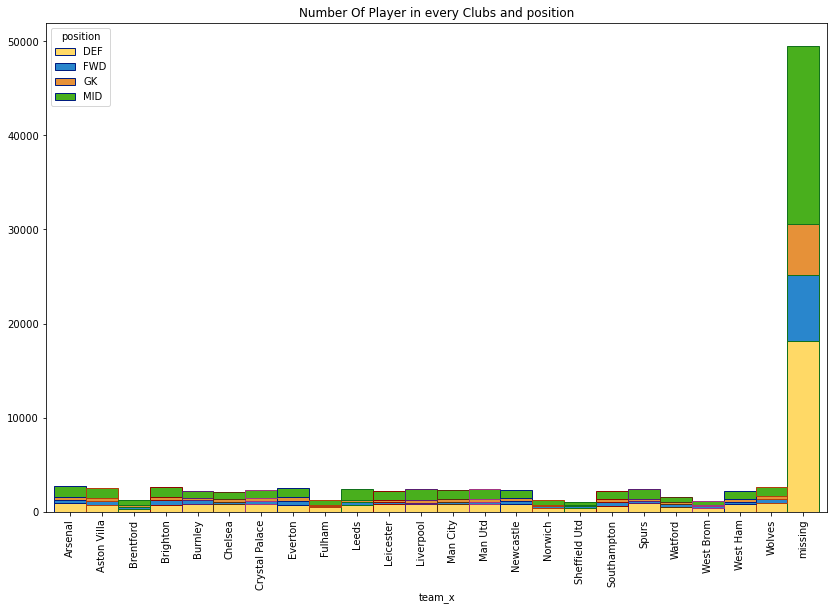

In [59]:

pd.crosstab(df.team_x,df.position).plot.bar(stacked=True,width=1,color=["#ffd966", "#2986cc", "#e69138" , "#49af1d" ],edgecolor=sns.color_palette('dark',7))

fig=plt.gcf()
fig.set_size_inches(14,9)
plt.title('Number Of Player in every Clubs and position')

plt.show()


#plt.subplots(figsize=(15,6))
#sns.barplot(x="team_x", y="position",data=dfmv,stacked=True ,palette='hot',edgecolor=sns.color_palette('dark',7))
#fig=plt.gcf()
#plt.xticks(rotation=90)
#plt.title('Average of Market Value in Every Clubs')
#plt.show()

In [60]:
enmax_palette = ["#ffd966", "#2986cc", "#e69138" , "#49af1d" ]
enmax_palette
#color_codes_wanted = ['Yellow', 'Blue', 'Orange','Green']

#sns.set_palette(sns.color_palette(enmax_palette))
sns.color_palette('Paired').

SyntaxError: invalid syntax (1588327890.py, line 6)

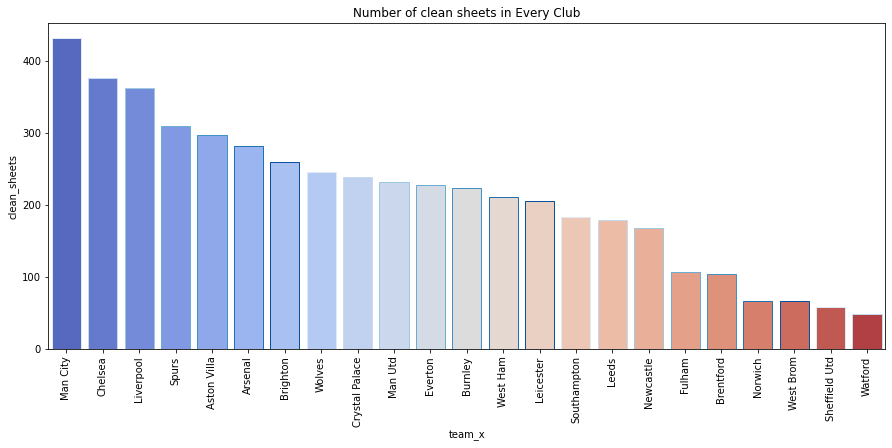

In [10]:
df_meantp=pd.DataFrame(df.groupby(['team_x'])['clean_sheets'].sum()).reset_index().sort_values('clean_sheets',ascending=False)

df_meantp

#club with their CleanSheets 


plt.subplots(figsize=(15,6))
sns.barplot(x="team_x", y="clean_sheets",data=df_meantp,palette='coolwarm',edgecolor=sns.color_palette('Blues',7))
plt.xticks(rotation=90)
plt.title('Number of clean sheets in Every Club')
plt.show()

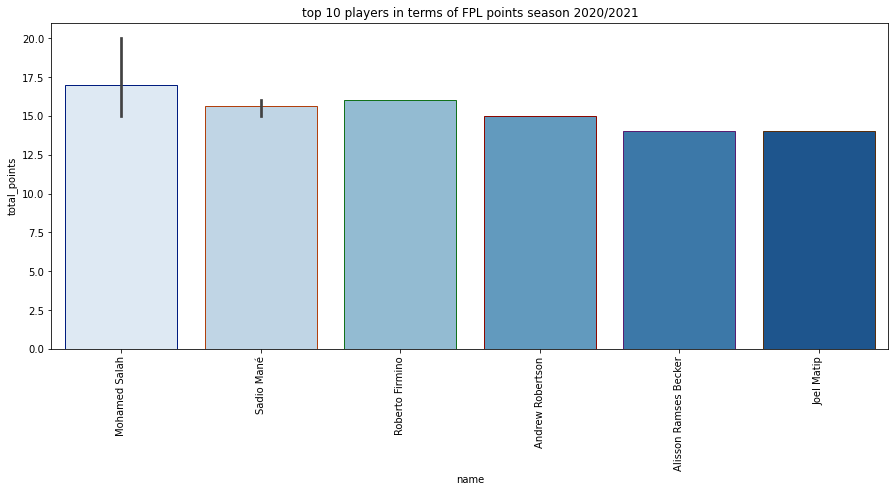

,Unnamed: 0,Unnamed: 0.1,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,...,last3_ratio_points,ratio_minutes_played,ratio_saves,player_value,ratio_own_goals,ratio_penalties_missed,ratio_penalties_saved,ratio_selection,ratio_creativity,ratio_threat
49773,49773,49773,2020-21,Mohamed Salah,MID,Liverpool,0,3,69,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50362,50362,50362,2020-21,Sadio Mané,MID,Liverpool,0,3,48,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56982,56982,56982,2020-21,Roberto Firmino,FWD,Liverpool,1,3,65,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57033,57033,57033,2020-21,Mohamed Salah,MID,Liverpool,1,2,52,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73398,73398,73398,2020-21,Sadio Mané,MID,Liverpool,0,3,53,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60640,60640,60640,2020-21,Sadio Mané,MID,Liverpool,2,2,41,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61313,61313,61313,2020-21,Mohamed Salah,MID,Liverpool,0,3,47,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72967,72967,72967,2020-21,Andrew Robertson,DEF,Liverpool,2,3,56,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49923,49923,49923,2020-21,Alisson Ramses Becker,GK,Liverpool,0,2,41,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55186,55186,55186,2020-21,Joel Matip,DEF,Liverpool,0,2,37,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
#df_P=pd.DataFrame(df.groupby(['name']) & (df['team_x']==['Liverpool'])
#df['team_x']=='West Ham']

Liv=df[(df["team_x"]== "Liverpool")&(df['name'])&(df["season_x"]=="2020-21")]

Liv

dfpts = Liv.nlargest(10, 'total_points').sort_values('total_points',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="name", y="total_points",  data=dfpts ,palette='Blues',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('top 10 players in terms of FPL points season 2020/2021')
plt.show()

dfpts

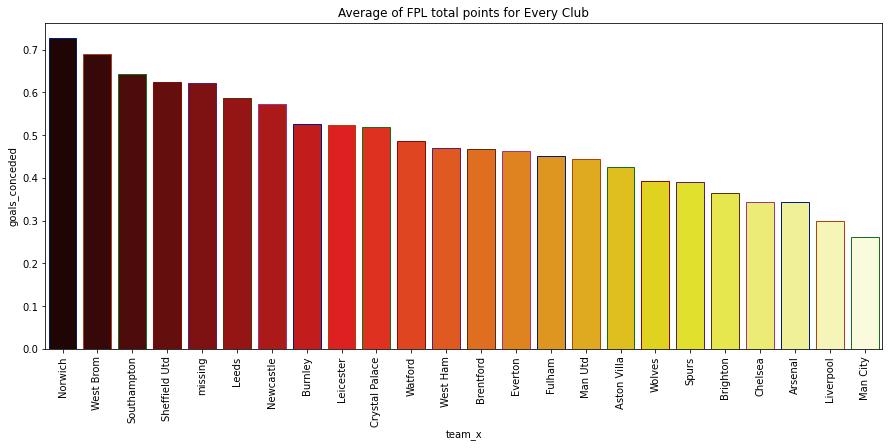

In [112]:
#club with their market value average

df_meanmv=pd.DataFrame(df.groupby(['team_x'])['goals_conceded'].mean()).reset_index().sort_values('goals_conceded',ascending=False)

plt.subplots(figsize=(15,6))
sns.barplot(x="team_x", y="goals_conceded",data=df_meanmv,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Average of FPL total points for Every Club')
plt.show()

# 2021-22 Season 

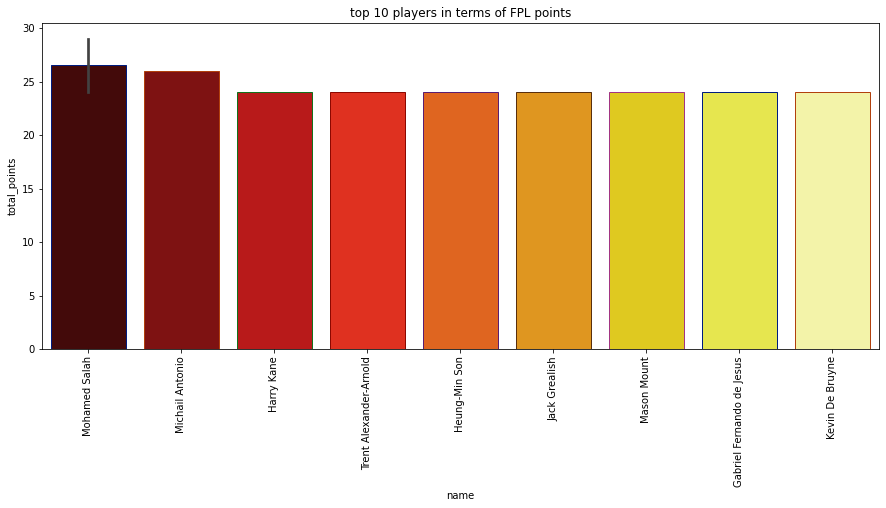

In [99]:
#df.loc[(df[df['team_x']=='West Ham']) & (df['name'])]

dfview = df.nlargest(10, 'total_points').sort_values('total_points',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="name", y="total_points",  data=dfview ,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('top 10 players in terms of FPL points')
plt.show()

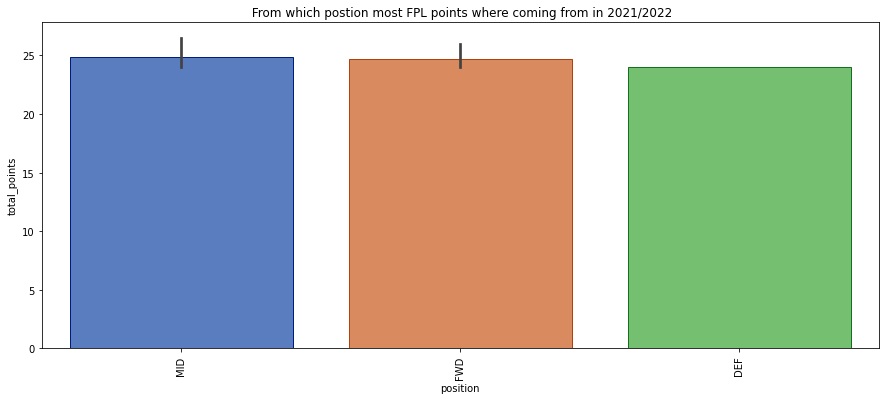

In [96]:
#(df[df['team_x'] == ['westham']] ) && (df[df[clean_sheets] > 1 )

dfview = df.nlargest(10, 'total_points').sort_values('total_points',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="position", y="total_points",  data=dfview ,palette='muted',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title(' From which postion most FPL points where coming from in 2021/2022')
plt.show()
                                          
                                          

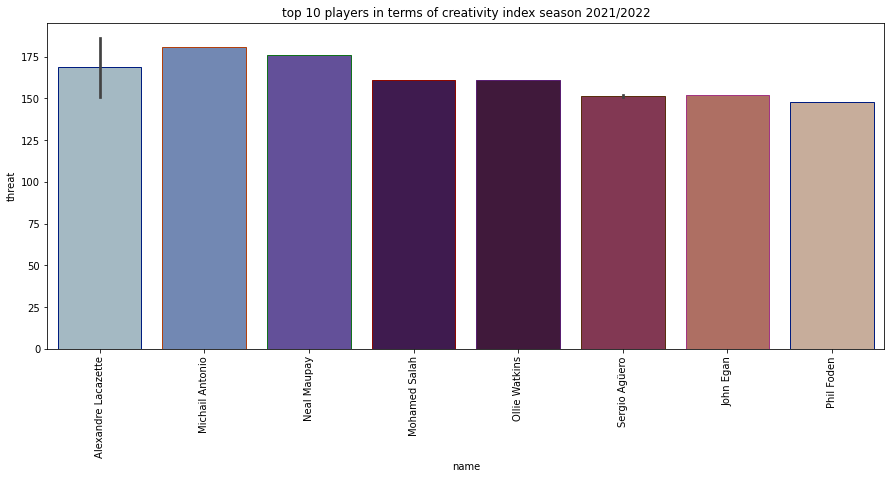

In [105]:
dfview = df.nlargest(10, 'threat').sort_values('threat',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="name", y="threat",  data=dfview ,palette='twilight',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('top 10 players in terms of creativity index season 2021/2022')
plt.show()

# 2020-21 Season 

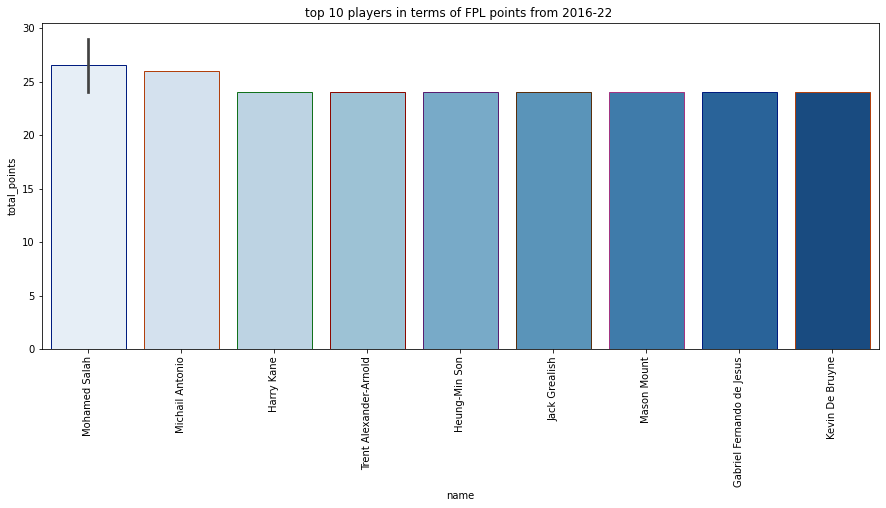

In [92]:
#pla21

dfpts = df.nlargest(10, 'total_points').sort_values('total_points',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="name", y="total_points",  data=dfpts ,palette='Blues',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('top 10 players in terms of FPL points from 2016-22 ')
plt.show()

In [122]:
df.nlargest(10, 'total_points').sort_values('name',ascending=False)

,Unnamed: 0,Unnamed: 0.1,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,...,last3_ratio_points,ratio_minutes_played,ratio_saves,player_value,ratio_own_goals,ratio_penalties_missed,ratio_penalties_saved,ratio_selection,ratio_creativity,ratio_threat
40138,40138,40138,2019-20,Trent Alexander-Arnold,DEF,missing,3,3,75,1,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000e+00,0.000000,0.000000
14877,14877,14877,2017-18,Mohamed Salah,MID,missing,1,3,93,1,...,6.000000,75.233333,0.0,106.0,0.0,0.033333,0.0,2.892543e+06,24.853333,57.433333
4902,4902,4902,2021-22,Mohamed Salah,MID,Liverpool,1,3,76,1,...,11.000000,90.000000,0.0,128.0,0.0,0.000000,0.0,4.449804e+06,33.112500,72.875000
47828,47828,47828,2019-20,Michail Antonio,FWD,missing,0,3,79,1,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000e+00,0.000000,0.000000
4879,4879,4879,2021-22,Mason Mount,MID,Chelsea,1,3,80,1,...,0.666667,44.500000,0.0,74.0,0.0,0.000000,0.0,1.142645e+06,15.050000,17.000000
22948,22948,22948,2021-22,Kevin De Bruyne,MID,Man City,0,3,87,0,...,5.000000,55.028571,0.0,119.0,0.0,0.000000,0.0,5.054904e+05,30.400000,20.971429
51211,51211,51211,2020-21,Jack Grealish,MID,Aston Villa,3,3,90,0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000e+00,0.000000,0.000000
50096,50096,50096,2020-21,Heung-Min Son,MID,Spurs,0,2,80,0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000e+00,0.000000,0.000000
6448,6448,6448,2016-17,Harry Kane,FWD,missing,1,3,114,0,...,3.000000,70.083333,0.0,117.0,0.0,0.027778,0.0,6.278851e+05,15.233333,42.500000
21757,21757,21757,2021-22,Gabriel Fernando de Jesus,FWD,Man City,1,3,128,0,...,11.333333,46.606061,0.0,84.0,0.0,0.000000,0.0,6.001182e+05,13.066667,28.545455


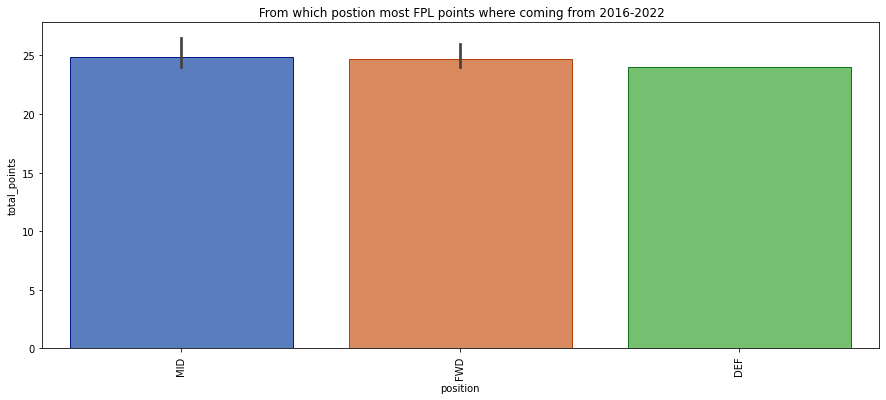

In [90]:
dfview = df.nlargest(10, 'total_points').sort_values('total_points',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="position", y="total_points",  data=dfview ,palette='muted',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title(' From which postion most FPL points where coming from 2016-2022')
plt.show()
          

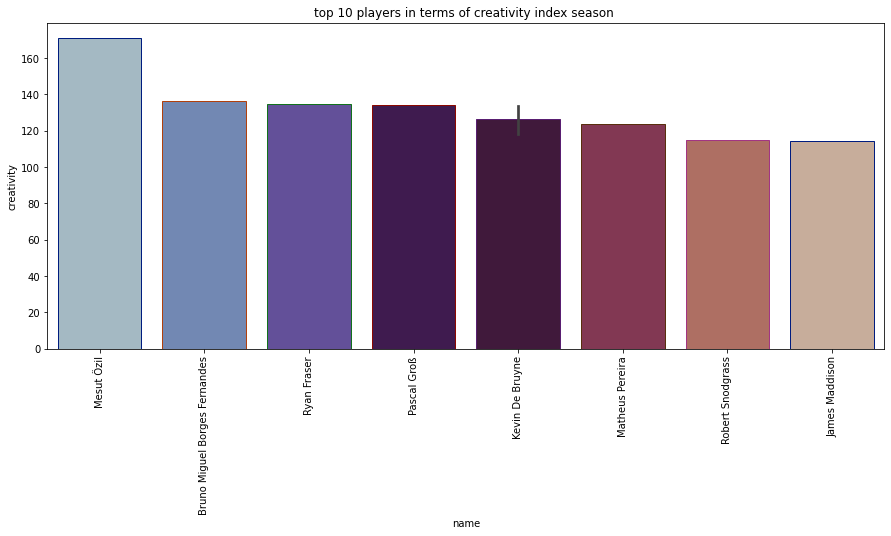

In [89]:
dfcrt = df.nlargest(10, 'creativity').sort_values('creativity',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="name", y="creativity",  data=dfcrt ,palette='twilight',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('top 10 players in terms of creativity index season ')
plt.show()

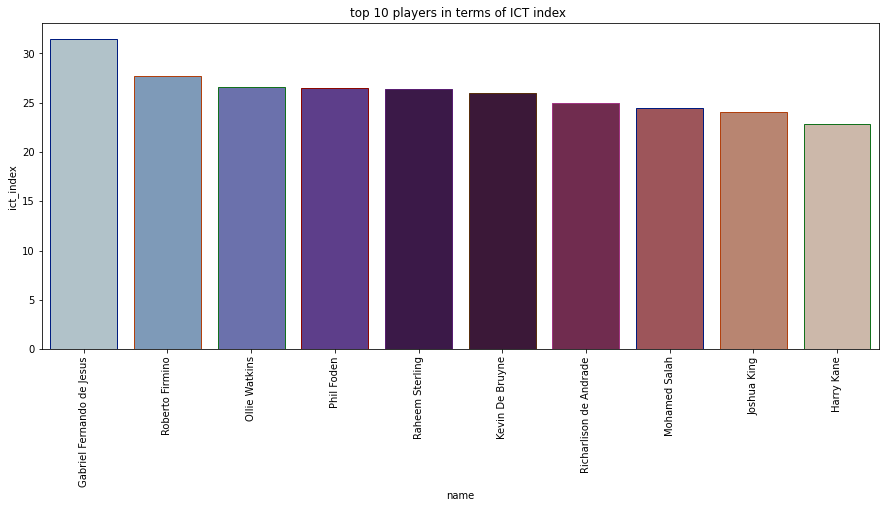

In [125]:
#ict_index

dfict = testdf.nlargest(10, 'ict_index').sort_values('ict_index',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="name", y="ict_index",  data=dfict ,palette='twilight',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('top 10 players in terms of ICT index ')
plt.show()

## To do next :
-Random Forrest

-Linear regression

-GBR & Ridge linear regression

-Evaluate the prediction

-Make slides show .

In [128]:
import sweetviz
import pandas as pd
tpdf = pd.read_csv('/Users/SulMac/Desktop/MiskDSI/FPL/Best-FPL-team-predictor/Data/cleaned_merged_seasons.csv')
my_report  = sweetviz.analyze([tpdf,'Train'], target_feat='total_points')
my_report.show_html('FinalReport.html')

                                             |      | [  0%]   00:00 -> (? left)

/Users/SulMac/opt/anaconda3/lib/python3.9/site-packages/sweetviz/graph_associations.py:208: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  f = corrplot(graph_data, dataframe_report)


Report FinalReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [132]:
pndf = pd.read_csv('/Users/SulMac/Desktop/MiskDSI/FPL/Best-FPL-team-predictor/Data/cleaned_merged_seasons.csv')
my_report  = sweetviz.analyze([pndf,'Train'], target_feat='ict_index')
my_report.show_html('ICTReport.html')

                                             |      | [  0%]   00:00 -> (? left)

/Users/SulMac/opt/anaconda3/lib/python3.9/site-packages/sweetviz/graph_associations.py:208: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  f = corrplot(graph_data, dataframe_report)


Report ICTReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [133]:
pndf = pd.read_csv('/Users/SulMac/Desktop/MiskDSI/FPL/Best-FPL-team-predictor/Data/cleaned_merged_seasons.csv')
my_report  = sweetviz.analyze([pndf,'Train'], target_feat='goals_scored')
my_report.show_html('GoalsReport.html')

                                             |      | [  0%]   00:00 -> (? left)

ValueError: TARGET values can only be of NUMERICAL or BOOLEAN type for now.
CATEGORICAL type was detected; if you meant the target to be
NUMERICAL, use a FeatureConfig(force_num=...) object.